https://www.kaggle.com/code/onurkoc83/quantum-machine-learning-tutorial

In [4]:
from sklearn import model_selection, datasets, svm
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService

In [5]:
iris = datasets.load_iris()

In [6]:
X = iris.data[0:100]
Y = iris.target[0:100]
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.33,random_state=42)

In [7]:
Y_train

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1])

In [8]:
X_train[0]

array([5.2, 3.4, 1.4, 0.2])

In [9]:
print(X_train[0])

[5.2 3.4 1.4 0.2]


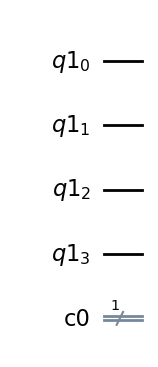

In [10]:
N=4
q = QuantumRegister(N)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

qc.draw("mpl")

the rx refers to the RX gate in Qiskit, which is a single-qubit rotation gate applied to a quantum circuit (qc). Specifically, it rotates the qubit’s state around the X-axis of the Bloch sphere by an angle specified by the parameter x.  X is the Pauli-X matrix.

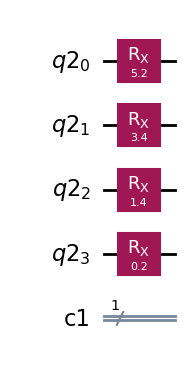

In [11]:
N=4
q = QuantumRegister(N)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

for i, x in enumerate(X_train[0]):
    qc.rx(x, i)

qc.draw("mpl")

In [12]:
N=4
def feature_map(X):

    q = QuantumRegister(N)
    c = ClassicalRegister(1)
    qc = QuantumCircuit(q, c)

    for i, x in enumerate(X):
        qc.rx(x, i)
    return qc, c 

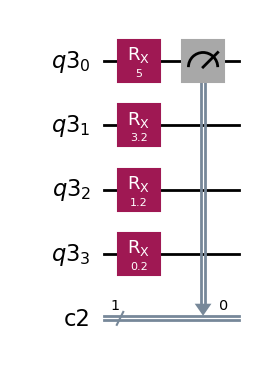

In [13]:
qc, c =feature_map(X_train[5])


# measurement operator
qc.measure(0,c)

qc.draw("mpl")

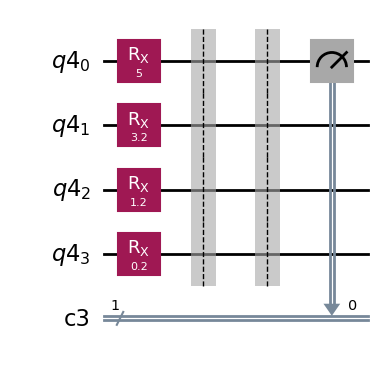

In [14]:
qc, c =feature_map(X_train[5])

qc.barrier()

qc.barrier()

# measurement operator
qc.measure(0,c)

qc.draw("mpl")

In [15]:
print(Y_train[5])

0


In [ ]:
Variational Circuits

In [18]:
def variational_circuit(qc, theta):
    N = qc.num_qubits  # Get the number of qubits directly from the circuit

    # Apply CNOT gates between adjacent qubits (Linear Entangler)
    for i in range(N - 1):
        # Correct: use qc.cx() instead of qc.cnot()
        qc.cx(i, i + 1)

    # Apply CNOT gate from the last to the first qubit (Periodic Entangler)
    # Correct: use qc.cx() instead of qc.cnot()
    qc.cx(N - 1, 0)
    
    # Apply RY rotation to every qubit
    for i in range(N):
        qc.ry(theta[i], i)
        
    return qc

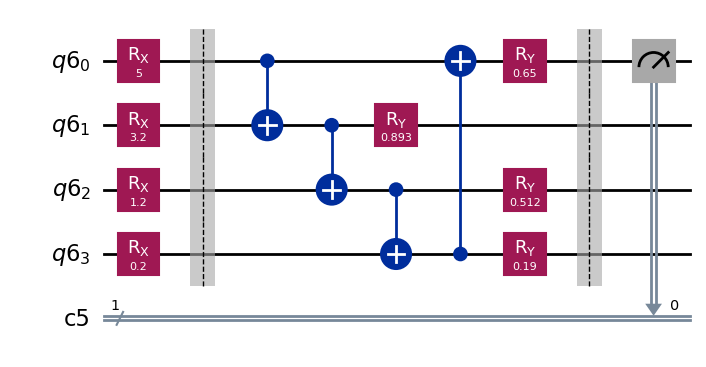

In [19]:
import numpy as np
qc, c =feature_map(X_train[5])

qc.barrier()

qc = variational_circuit(qc, np.random.rand(N))

qc.barrier()

# measurement operator
qc.measure(0,c)

qc.draw("mpl")

Blue line are circuits not gates. they create entanglement, so they essentially allow information to travel from one qubit to another